Standardization (Z-score) & Normalization (Min-Max)

Machine Learning models work better when features are on the same scale.

In [1]:
# ----------------------------------
# DAY 11: FEATURE SCALING
# ----------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Cleaning
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Select only numerical columns for scaling
num_features = df[['Age', 'Fare', 'FamilySize']]
print(num_features.head())


    Age     Fare  FamilySize
0  22.0   7.2500           2
1  38.0  71.2833           2
2  26.0   7.9250           1
3  35.0  53.1000           2
4  35.0   8.0500           1


/tmp/ipython-input-3549589940.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3549589940.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Standardization (Z-score Scaling)

Formula:
z=(x−μ​)/σ
	​


Mean becomes 0, Standard deviation becomes 1.

In [2]:
scaler_standard = StandardScaler()
standard_scaled = scaler_standard.fit_transform(num_features)

standard_df = pd.DataFrame(standard_scaled, columns=num_features.columns)

print("Standardized Data:")
print(standard_df.head())

print("\nMeans after Standardization:")
print(standard_df.mean())

print("\nStandard Deviations after Standardization:")
print(standard_df.std())


Standardized Data:
        Age      Fare  FamilySize
0 -0.592481 -0.502445    0.059160
1  0.638789  0.786845    0.059160
2 -0.284663 -0.488854   -0.560975
3  0.407926  0.420730    0.059160
4  0.407926 -0.486337   -0.560975

Means after Standardization:
Age           2.232906e-16
Fare          3.987333e-18
FamilySize   -2.392400e-17
dtype: float64

Standard Deviations after Standardization:
Age           1.000562
Fare          1.000562
FamilySize    1.000562
dtype: float64


Used in:

Logistic Regression

SVM

KNN

Neural Networks

Normalization (Min-Max Scaling)

Formula:
x′=(​x−xmin​​)/(xmax​−xmin)

Values are scaled between 0 and 1.

In [3]:
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(num_features)

minmax_df = pd.DataFrame(minmax_scaled, columns=num_features.columns)

print("Min-Max Normalized Data:")
print(minmax_df.head())

print("\nMinimum values after Normalization:")
print(minmax_df.min())

print("\nMaximum values after Normalization:")
print(minmax_df.max())


Min-Max Normalized Data:
        Age      Fare  FamilySize
0  0.271174  0.014151         0.1
1  0.472229  0.139136         0.1
2  0.321438  0.015469         0.0
3  0.434531  0.103644         0.1
4  0.434531  0.015713         0.0

Minimum values after Normalization:
Age           0.0
Fare          0.0
FamilySize    0.0
dtype: float64

Maximum values after Normalization:
Age           1.0
Fare          1.0
FamilySize    1.0
dtype: float64


Used in:

Neural Networks

Distance-based algorithms

Image processing

Compare Original vs Scaled Data

In [4]:
comparison = pd.concat([
    num_features.head(),
    standard_df.head(),
    minmax_df.head()
], axis=1)

comparison.columns = [
    'Age_original', 'Fare_original', 'FamilySize_original',
    'Age_standard', 'Fare_standard', 'FamilySize_standard',
    'Age_minmax', 'Fare_minmax', 'FamilySize_minmax'
]

comparison


,Age_original,Fare_original,FamilySize_original,Age_standard,Fare_standard,FamilySize_standard,Age_minmax,Fare_minmax,FamilySize_minmax
0,22.0,7.2500,2,-0.592481,-0.502445,0.059160,0.271174,0.014151,0.1
1,38.0,71.2833,2,0.638789,0.786845,0.059160,0.472229,0.139136,0.1
2,26.0,7.9250,1,-0.284663,-0.488854,-0.560975,0.321438,0.015469,0.0
3,35.0,53.1000,2,0.407926,0.420730,0.059160,0.434531,0.103644,0.1
4,35.0,8.0500,1,0.407926,-0.486337,-0.560975,0.434531,0.015713,0.0


Visualization: Before vs After Scaling

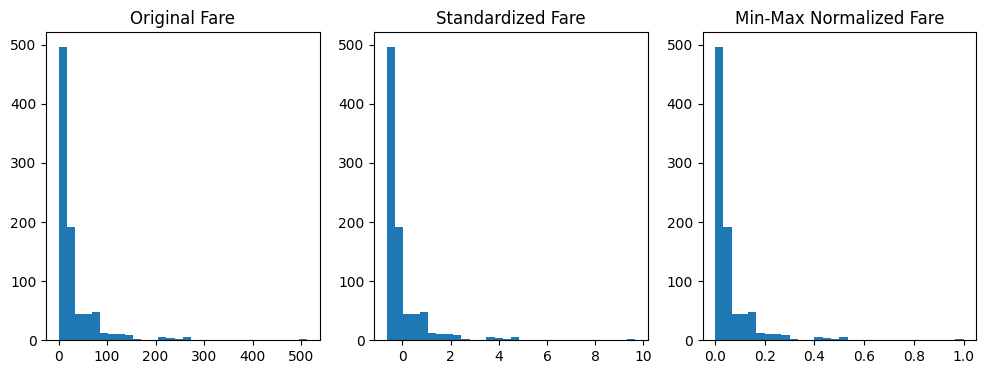

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(num_features['Fare'], bins=30)
plt.title("Original Fare")

plt.subplot(1,3,2)
plt.hist(standard_df['Fare'], bins=30)
plt.title("Standardized Fare")

plt.subplot(1,3,3)
plt.hist(minmax_df['Fare'], bins=30)
plt.title("Min-Max Normalized Fare")

plt.show()


    When to Use What?
    Scaling Type	When to Use
    Standardization	Data is normally distributed, ML models like regression, SVM
    Normalization	Data has no normal distribution, NN, KNN, images





Mini Task

Try scaling only:

In [6]:
df[['Age','Fare']]


,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [7]:
# Mini Task continuation: Scale only Age and Fare and visualize

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Select only Age and Fare
two_features = df[['Age', 'Fare']]

# 1️⃣ Standardization
scaler_standard = StandardScaler()
standard_scaled_2 = scaler_standard.fit_transform(two_features)
standard_df_2 = pd.DataFrame(standard_scaled_2, columns=['Age_standard', 'Fare_standard'])

# 2️⃣ Normalization
scaler_minmax = MinMaxScaler()
minmax_scaled_2 = scaler_minmax.fit_transform(two_features)
minmax_df_2 = pd.DataFrame(minmax_scaled_2, columns=['Age_minmax', 'Fare_minmax'])

# Show comparison
comparison_2 = pd.concat([two_features.head(), standard_df_2.head(), minmax_df_2.head()], axis=1)
comparison_2.columns = [
    'Age_original', 'Fare_original',
    'Age_standard', 'Fare_standard',
    'Age_minmax', 'Fare_minmax'
]
comparison_2


,Age_original,Fare_original,Age_standard,Fare_standard,Age_minmax,Fare_minmax
0,22.0,7.2500,-0.592481,-0.502445,0.271174,0.014151
1,38.0,71.2833,0.638789,0.786845,0.472229,0.139136
2,26.0,7.9250,-0.284663,-0.488854,0.321438,0.015469
3,35.0,53.1000,0.407926,0.420730,0.434531,0.103644
4,35.0,8.0500,0.407926,-0.486337,0.434531,0.015713


Visualization for Age

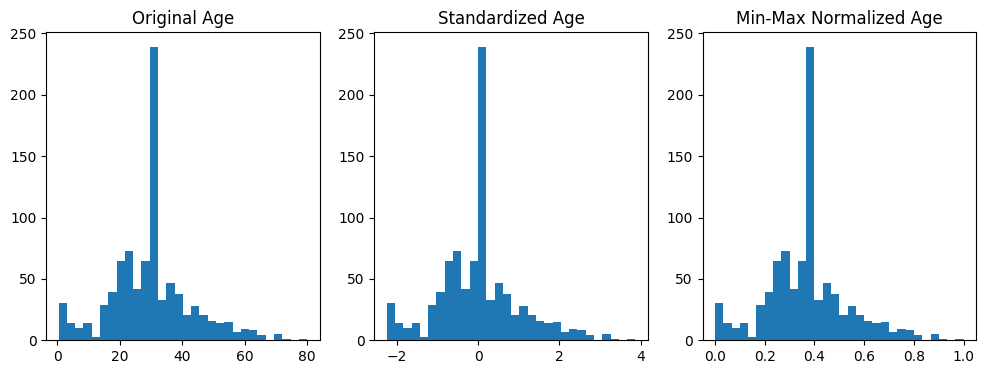

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(two_features['Age'], bins=30)
plt.title("Original Age")

plt.subplot(1,3,2)
plt.hist(standard_df_2['Age_standard'], bins=30)
plt.title("Standardized Age")

plt.subplot(1,3,3)
plt.hist(minmax_df_2['Age_minmax'], bins=30)
plt.title("Min-Max Normalized Age")

plt.show()


Visualization for Fare

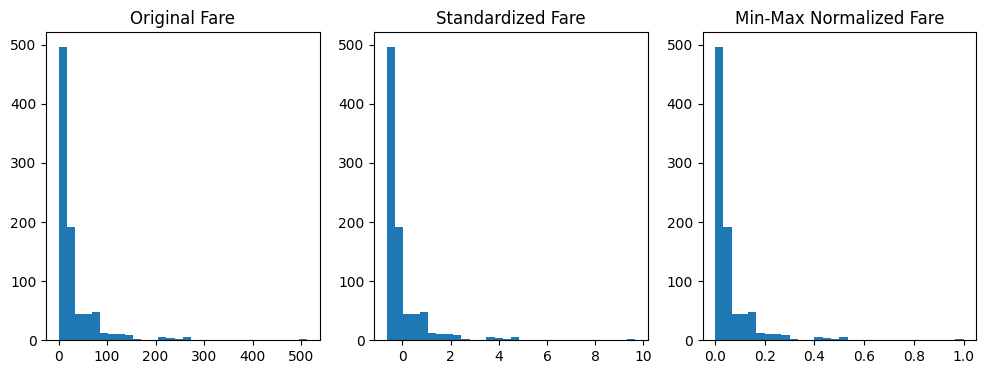

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(two_features['Fare'], bins=30)
plt.title("Original Fare")

plt.subplot(1,3,2)
plt.hist(standard_df_2['Fare_standard'], bins=30)
plt.title("Standardized Fare")

plt.subplot(1,3,3)
plt.hist(minmax_df_2['Fare_minmax'], bins=30)
plt.title("Min-Max Normalized Fare")

plt.show()


Original: Different ranges and shapes

Standardized: Centered around 0, spread evenly

Min-Max: All values squeezed between 0 and 1

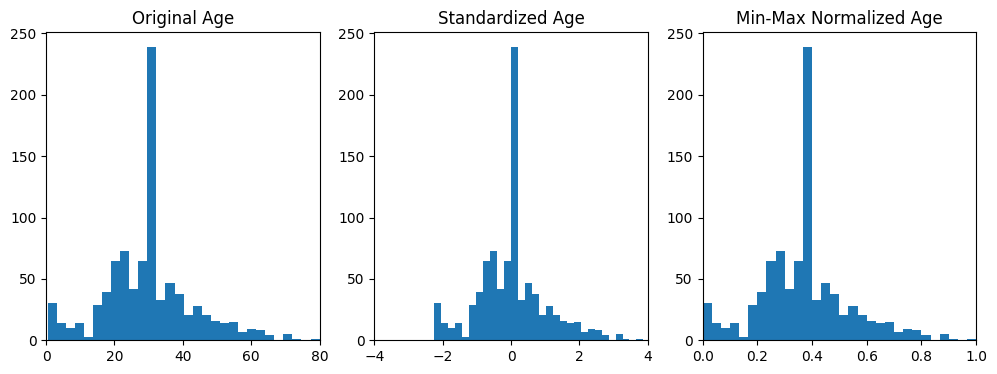

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(two_features['Age'], bins=30)
plt.title("Original Age")
plt.xlim(0, 80)

plt.subplot(1,3,2)
plt.hist(standard_df_2['Age_standard'], bins=30)
plt.title("Standardized Age")
plt.xlim(-4, 4)

plt.subplot(1,3,3)
plt.hist(minmax_df_2['Age_minmax'], bins=30)
plt.title("Min-Max Normalized Age")
plt.xlim(0, 1)

plt.show()


Now you will clearly see:

Original → values around 0 to 80

Standardized → centered around 0

MinMax → squeezed between 0 and 1

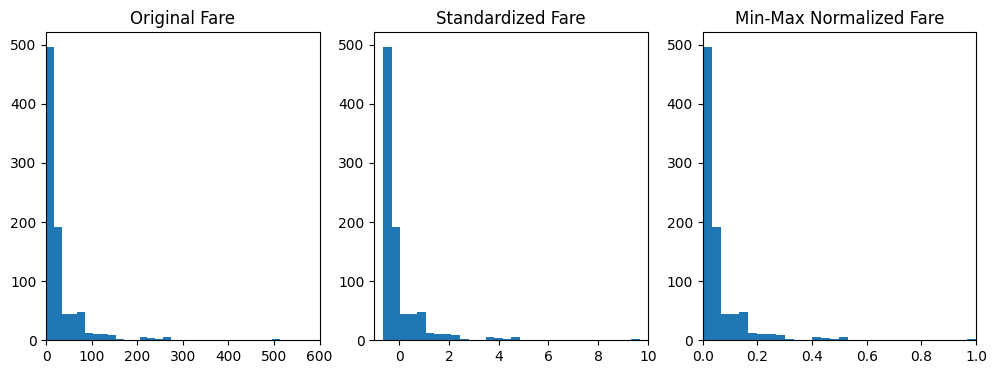

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(two_features['Fare'], bins=30)
plt.title("Original Fare")
plt.xlim(0, 600)

plt.subplot(1,3,2)
plt.hist(standard_df_2['Fare_standard'], bins=30)
plt.title("Standardized Fare")
plt.xlim(-1, 10)

plt.subplot(1,3,3)
plt.hist(minmax_df_2['Fare_minmax'], bins=30)
plt.title("Min-Max Normalized Fare")
plt.xlim(0, 1)

plt.show()


print the ranges to prove it mathematically:

In [12]:
print("Original Age Range:", two_features['Age'].min(), "-", two_features['Age'].max())
print("Standardized Age Range:", standard_df_2['Age_standard'].min(), "-", standard_df_2['Age_standard'].max())
print("MinMax Age Range:", minmax_df_2['Age_minmax'].min(), "-", minmax_df_2['Age_minmax'].max())

print("\nOriginal Fare Range:", two_features['Fare'].min(), "-", two_features['Fare'].max())
print("Standardized Fare Range:", standard_df_2['Fare_standard'].min(), "-", standard_df_2['Fare_standard'].max())
print("MinMax Fare Range:", minmax_df_2['Fare_minmax'].min(), "-", minmax_df_2['Fare_minmax'].max())


Original Age Range: 0.42 - 80.0
Standardized Age Range: -2.2531554887793948 - 3.8708717431367323
MinMax Age Range: 0.0 - 1.0

Original Fare Range: 0.0 - 512.3292
Standardized Fare Range: -0.6484216535389205 - 9.667166525013505
MinMax Fare Range: 0.0 - 1.0


Scaling does NOT change distribution shape.
It only changes numerical scale so ML models treat features equally.

If they looked different in shape, that would actually mean something is wrong. if not then no problem